#Методичка

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [246]:
x = pd.read_csv('2_x.csv')
y = pd.read_csv('2_y.csv')

In [247]:
x.head()

,-0.5008220696918825,-0.32652603102208627,-0.27736001202366434,-0.4431410183023503,0.8264879481178152
0,-0.783084,-0.198363,0.762444,-0.222940,0.469849
1,-1.168173,0.411563,0.983402,-0.899597,-1.594121
2,0.793839,0.161262,-1.075209,-1.351574,0.132724
3,-0.880914,-0.635828,-1.055353,0.206016,1.210570
4,0.836309,-1.766573,1.171314,0.326003,0.551481


In [248]:
y.head()

,-46.74492114875288
0,23.918809
1,-86.382982
2,-75.265223
3,-72.452990
4,116.394521


In [249]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [250]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [251]:
y.head()

0    101.159902
1     78.442913
2   -159.238195
3    120.719533
4      2.920673
Name: 0, dtype: float64

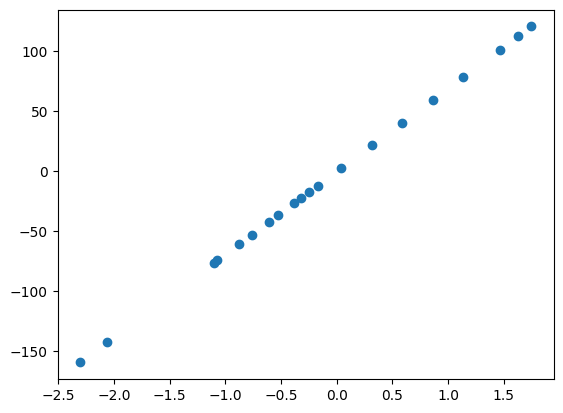

In [252]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [253]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
      return self.b0 + self.b1 * x

    def error(self, X, Y):    
      return sum((self.predict(X) - Y)**2) / (2 * len(X)) 

    def fit(self, X, Y):  
      alpha = 0.1
      dJ0 = sum(self.predict(X) - Y) /len(X)
      dJ1 = sum((self.predict(X) - Y) * X) /len(X)
      self.b0 -= alpha * dJ0
      self.b1 -= alpha * dJ1

In [254]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153397


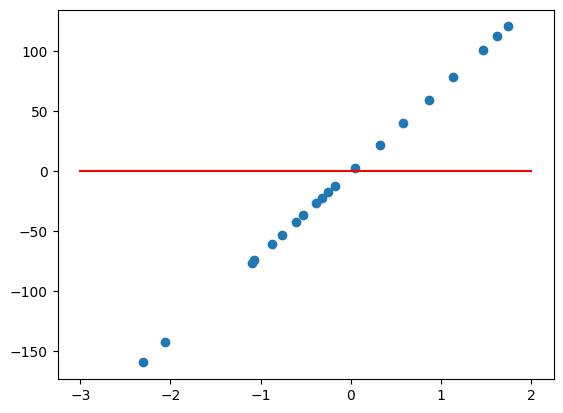

In [255]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [256]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0  #cвободный член
        self.b1 = 0  #коэффициент наклона
    
    def predict(self, X):
        return self.b0 + self.b1 * np.array(X, dtype=float)
    
    def error(self, X, Y):
        X = np.array(X, dtype=float)
        Y = np.array(Y, dtype=float)
        return np.sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        X = np.array(X, dtype=float)
        Y = np.array(Y, dtype=float)
        
        steps, errors = [], []
        prev_err = float('inf')
        
        for step in range(1, max_steps + 1):
            predictions = self.predict(X)
            dJ0 = np.sum(predictions - Y) / len(X)
            dJ1 = np.sum((predictions - Y) * X) / len(X)
            
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            
            current_err = self.error(X, Y)
            
            steps.append(step)
            errors.append(current_err)
            
            if abs(prev_err - current_err) < accuracy:
                break
            prev_err = current_err
        
        return steps, errors


In [257]:

hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("Error after gradient descent:", J)
print(f"Final parameters: b0={hyp.b0:.4f}, b1={hyp.b1:.4f}")


Error after gradient descent: 4.4961047667431675
Final parameters: b0=-1.2441, b1=66.5860


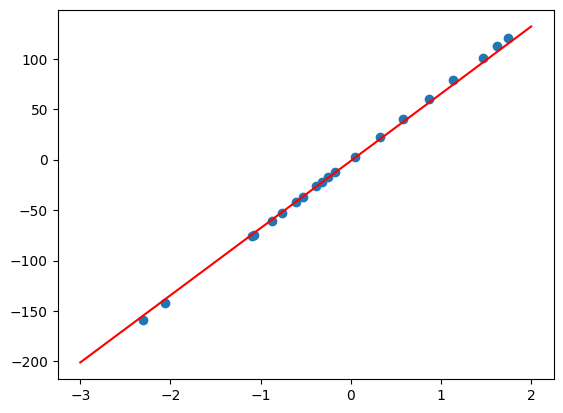

In [258]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

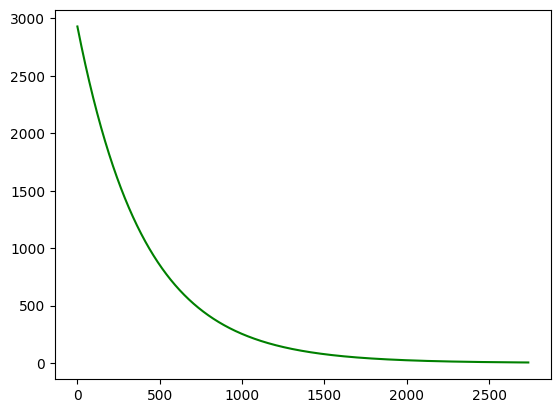

In [259]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Задания для самостоятельно работы

In [260]:
df = pd.read_csv('real_estate_large.csv').iloc[:100]
df.head()

,area_sqm,price_usd,city,rooms,floor,has_parking,is_new_building,distance_to_center_km
0,45,110000,Москва,1,3,False,False,7
1,52,125000,Санкт-Петербург,1,5,True,True,4
2,60,145000,Казань,2,2,False,True,3
3,65,160000,Новосибирск,2,1,True,False,5
4,70,175000,Екатеринбург,2,7,False,False,6


Отношение площади к цене

In [261]:
square = df['area_sqm']
square.head()

0    45
1    52
2    60
3    65
4    70
Name: area_sqm, dtype: int64

In [262]:
price = df['price_usd']
price.head()

0    110000
1    125000
2    145000
3    160000
4    175000
Name: price_usd, dtype: int64

In [263]:
hyp = Model()
steps, errors = hyp.fit(square, price,alpha=0.00001)
J = hyp.error(square, price)
print("error after gradient descent:", J)

error after gradient descent: 447687804.31162137


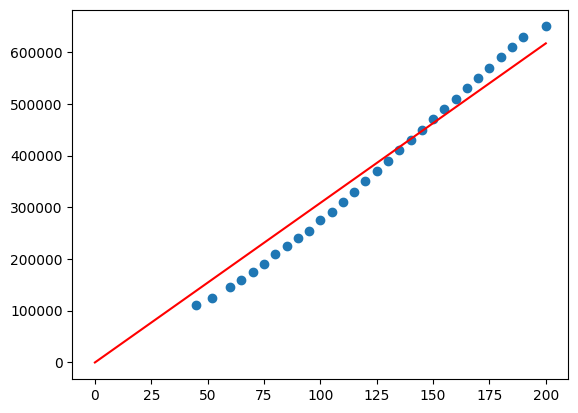

In [264]:
X0 = np.linspace(0, 200, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(square, price)
plt.plot(X0, Y0, 'r')
plt.show()

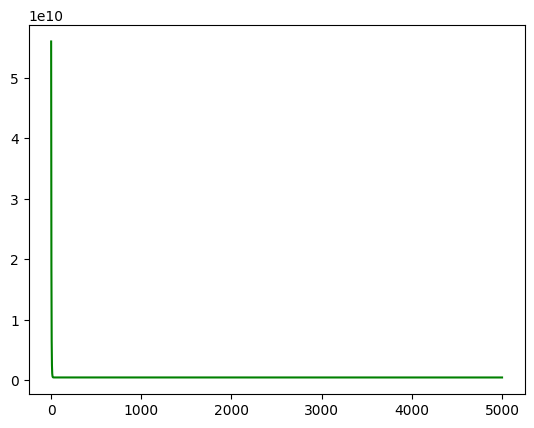

In [265]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [266]:
hyp = Model()
steps, errors = hyp.fit(square, price,alpha = 0.0001)
J = hyp.error(square, price)
print("error after gradient descent:", J)

error after gradient descent: 408194503.4465142


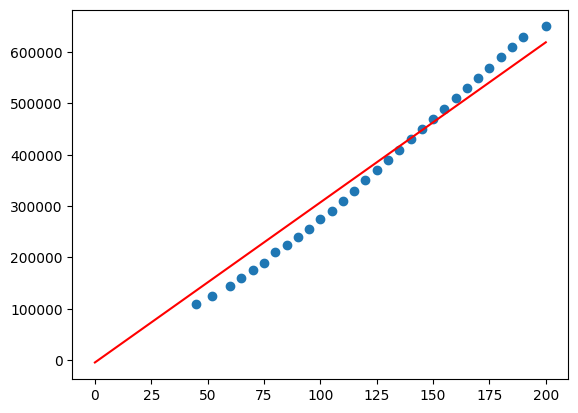

In [267]:
X0 = np.linspace(0, 200, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(square, price)
plt.plot(X0, Y0, 'r')
plt.show()

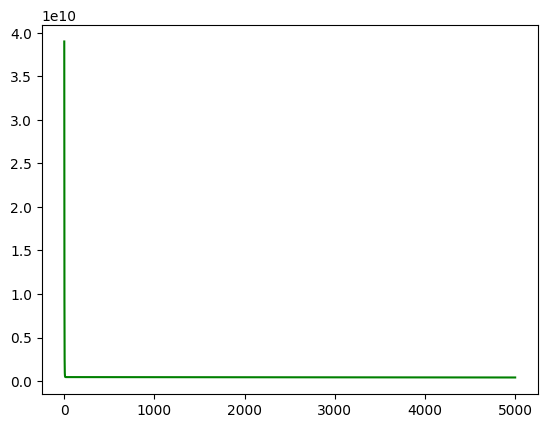

In [268]:
plt.figure()
plt.plot(steps, errors, 'green')
plt.show()

Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов

In [269]:
import numpy as np
import pandas as pd

class Model(object):
    """Модель парной линейной регрессии с поддержкой Series и DataFrame"""
    def __init__(self):
        self.b0 = 0.0  # свободный член (intercept)
        self.b1 = 0.0  # коэффициент наклона (slope)
    
    def _ensure_numpy(self, data):
        if isinstance(data, (pd.DataFrame, pd.Series)):
            return data.values.flatten()
        return np.array(data, dtype=np.float64)
    
    def predict(self, X):
        X = self._ensure_numpy(X)
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        X = self._ensure_numpy(X)
        Y = self._ensure_numpy(Y)
        diff = self.predict(X) - Y
        return np.sum(diff**2) / (2 * len(X))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        X = self._ensure_numpy(X)
        Y = self._ensure_numpy(Y)
        
        # Проверка размеров
        if len(X) != len(Y):
            raise ValueError("X и Y должны иметь одинаковую длину")
        
        steps, errors = [], []
        prev_err = float('inf')
        
        for step in range(1, max_steps + 1):
            predictions = self.predict(X)
            
            dJ0 = np.sum(predictions - Y) / len(X)
            dJ1 = np.sum((predictions - Y) * X) / len(X)
            
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            
            current_err = self.error(X, Y)
            steps.append(step)
            errors.append(current_err)
            
            if abs(prev_err - current_err) < accuracy:
                break
            prev_err = current_err
        
        return steps, errors

In [270]:
x = pd.read_csv('2_x.csv').iloc[:, 0]
y = pd.read_csv('2_y.csv').iloc[:, 0]

In [271]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print(f"Error: {J:.4f}")
print(f"Parameters: b0={hyp.b0:.4f}, b1={hyp.b1:.4f}")

Error: 5445.6856
Parameters: b0=-8.1290, b1=51.5486


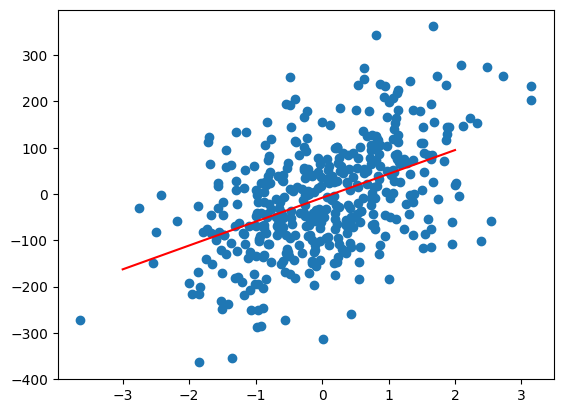

In [272]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

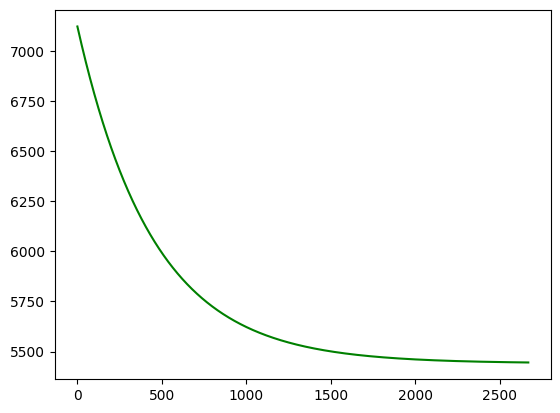

In [273]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [274]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def is_correct(self,X):
      try:
        if X.shape[1] != 1:
          raise Exception
        else:         
            X = X.iloc[:,0]
            return X
      except:
        return X        
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        X = self.is_correct(X)
        Y = self.is_correct(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.1, accuracy=0.1, max_steps=5000,stop = 0.00001):
        X = self.is_correct(X)
        Y = self.is_correct(Y)
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if new_err < stop:
              break
        return steps, errors

In [275]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 5441.154247708701


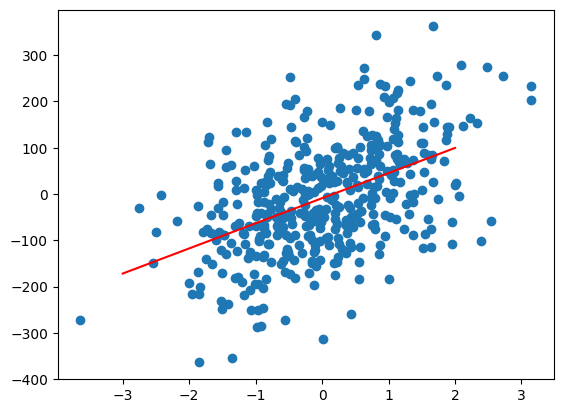

In [276]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

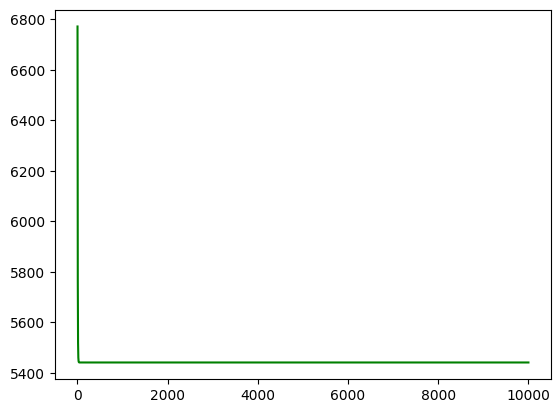

In [277]:
plt.figure()
plt.plot(steps, errors, 'green')
plt.show()

Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [278]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def is_correct(self,X):
      try:
        if X.shape[1] != 1:
          raise Exception
        else:         
            X = X.iloc[:,0]
            return X
      except:
        return X        
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        X = self.is_correct(X)
        Y = self.is_correct(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, accuracy=0.1, max_steps=5000,stop = 0.00001):
        err_save = 0
        alpha = 1
        X = self.is_correct(X)
        Y = self.is_correct(Y)
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            if new_err > err_save:
              aplpa = alpha / 2
            err_save = new_err
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if new_err < stop:
              break
        return steps, errors

In [279]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 5441.154247708701


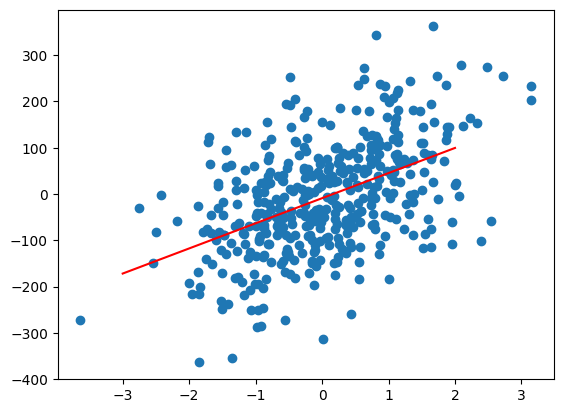

In [280]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

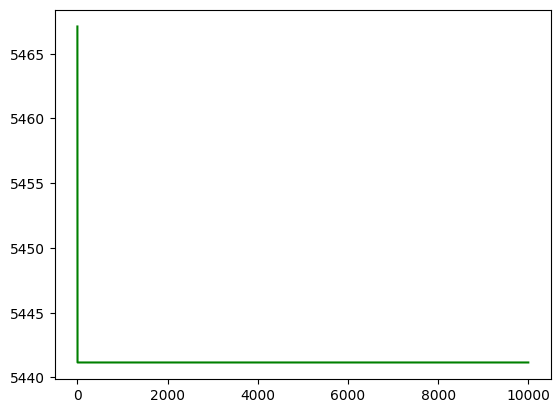

In [281]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [282]:
import numpy as np
import matplotlib.pyplot as plt

class Model(object):
    def __init__(self):
        self.b0 = 0  # свободный член
        self.b1 = 0  # коэффициент наклона
        self.steps = [] 
        self.errors = [] 
    
    def to_plot(self, x, y):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        X_plot = np.linspace(min(x)-1, max(x)+1, 100)
        Y_pred = self.predict(X_plot)
        plt.scatter(x, y)
        plt.plot(X_plot, Y_pred, 'r')
        plt.grid(True)
        
        plt.subplot(1, 2, 2)
        plt.plot(self.steps, self.errors, 'g')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    def is_correct(self, X):
        if hasattr(X, 'shape'):
            if len(X.shape) > 1 and X.shape[1] != 1:
                return X.iloc[:, 0] if hasattr(X, 'iloc') else X[:, 0]
        return X
    
    def predict(self, X):
        return self.b0 + self.b1 * np.array(X, dtype=float)
    
    def error(self, X, Y):
        X = self.is_correct(X)
        Y = self.is_correct(Y)
        return np.sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y, accuracy=0.1, max_steps=5000, stop=0.00001):
        X = self.is_correct(X)
        Y = self.is_correct(Y)
        X = np.array(X, dtype=float)
        Y = np.array(Y, dtype=float)
        
        alpha = 1  # начальный learning rate
        prev_err = float('inf')
        self.steps = []
        self.errors = []
        
        for step in range(1, max_steps + 1):
            predictions = self.predict(X)
            
            dJ0 = np.sum(predictions - Y) / len(X)
            dJ1 = np.sum((predictions - Y) * X) / len(X)
            
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            
            current_err = self.error(X, Y)
            self.steps.append(step)
            self.errors.append(current_err)
            
            # aдаптивный learning rate
            if current_err > prev_err:
                alpha /= 2
            
            # критерий остановки
            if current_err < stop or abs(prev_err - current_err) < accuracy:
                break
                
            prev_err = current_err
        
        return self.steps, self.errors

In [283]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 5441.15439177473


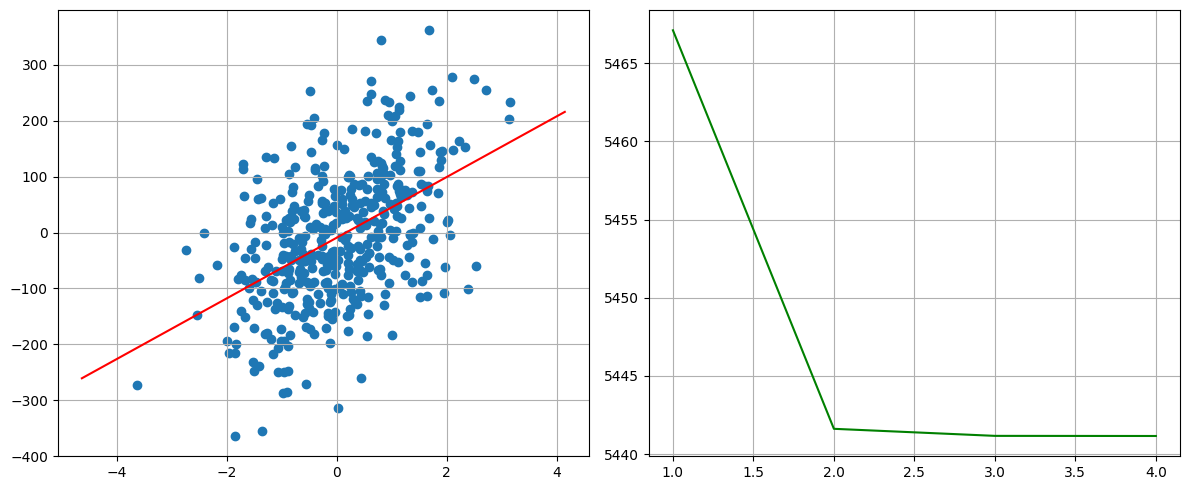

In [284]:
hyp.to_plot(x,y)
